In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
mnist=tf.keras.datasets.mnist

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
import matplotlib.pyplot as plt

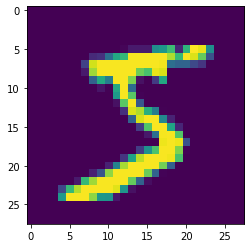

In [14]:
plt.imshow(X_train[0])
plt.show()

In [16]:
X_train=X_train/255.0

In [17]:
X_test=X_test/255.0

In [21]:
model=Sequential()
model.add(Dense(200,activation='relu',input_dim=784))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
model.fit(X_train.reshape(-1,784),y_train,epochs=50,batch_size=50,validation_split=.2)

Epoch 1/50
960/960 [==============================] - 2s 1ms/step - loss: 0.8290 - accuracy: 0.7928 - val_loss: 0.3784 - val_accuracy: 0.8951
Epoch 2/50
960/960 [==============================] - 1s 1ms/step - loss: 0.3567 - accuracy: 0.8996 - val_loss: 0.2959 - val_accuracy: 0.9155
Epoch 3/50
960/960 [==============================] - 1s 1ms/step - loss: 0.2978 - accuracy: 0.9152 - val_loss: 0.2643 - val_accuracy: 0.9258
Epoch 4/50
960/960 [==============================] - 1s 1ms/step - loss: 0.2639 - accuracy: 0.9242 - val_loss: 0.2395 - val_accuracy: 0.9316
Epoch 5/50
960/960 [==============================] - 1s 1ms/step - loss: 0.2388 - accuracy: 0.9319 - val_loss: 0.2222 - val_accuracy: 0.9362
Epoch 6/50
960/960 [==============================] - 1s 1ms/step - loss: 0.2187 - accuracy: 0.9370 - val_loss: 0.2032 - val_accuracy: 0.9435
Epoch 7/50
960/960 [==============================] - 1s 1ms/step - loss: 0.2013 - accuracy: 0.9423 - val_loss: 0.1917 - val_accuracy: 0.9466
Epoch 

In [22]:
model.evaluate(X_test.reshape(-1,784),y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9749


[0.08081591129302979, 0.9749000072479248]

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.history.history

{}

In [52]:
model=Sequential()
model.add(Dense(300,activation='relu',input_dim=784))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history=model.fit(X_train.reshape(-1,784),y_train,epochs=200,batch_size=50,validation_split=.2,verbose=0)

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
history.history['val_accuracy'][-1]

0.9783333539962769

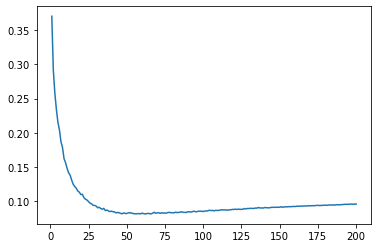

In [56]:
plt.plot(range(1,201),history.history['val_loss'])
plt.show()

In [57]:
model.evaluate(X_test.reshape(-1,784),y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9810


[0.07996343076229095, 0.9810000061988831]

In [58]:
import cv2

In [62]:
img=cv2.imread("2.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=gray/255.0
probs=model.predict(gray.reshape(-1,784))
import numpy as np
np.argmax(probs,-1)

array([2], dtype=int64)